# **Intrusion Classification  - A Network Security Problem**

In [1]:
#Load an image of network security , JUST BECAUSE :)
from IPython.display import Image
Image(url='https://images.spiceworks.com/wp-content/uploads/2021/02/24115356/shutterstock_1472495273.jpg')

**This project aims to enhance my knowledge of machine learning concepts introduced in my masters program at Georgia tech and apply them to a network intrusion data set. With the proliferation of computer networks and applications, cybersecurity researchers faces challenges in detecting and mitigating intrusions that compromise systems. I will be exploring the UNSW-NB15 dataset (ReadMe available in the folder & Description Below) to explore classification techniques in Network Security.The data set has 9 attack types along with normal vectors which I will model through supervised learning techniques. The main algorithms used in this notebook are Principal Component Analysis and Singular Value Decomposition(SVD) for Dimensionality Reduction ,Naive Bayes Classifier, Logistic regression ,  K-Nearest Neighbour and Multiclass Support Vector Machines(SVM).**


**Project Steps**

1. **Exploratory Data**:
   - Describe the UNSW-NB15 dataset, including its source, size, and features.
   - Analyze the distribution of data to gain insights into its characteristics.
   - Identify any trends, patterns, or anomalies present in the dataset.

2. **Preprocessing Tasks**:
     - Handling missing or inconsistent data.
     - Removing outliers to improve model performance.
     - One-hot encoding categorical variables to convert them into numerical format.
     - Scaling features to address variations in their ranges.
     - Addressing dimensionality reduction through PCA/SVD to reduce the number of features while preserving important information.

4. **Claasification Models**:
   - Introduce  techniques and its relevance in network security.
   - Present and explain the 4 classification models used and analyze how each does at identfying the different types of attacks:
     - Naive Bayes
     - K-Nearest Neighbour
     - Multi Class Support Vector Machines
     - Logistic Regression

5. **Model Fitting ,Evaluation and Testing**:
   - Explain the process of fitting each  model using preprocessed data.
   - Define evaluation metrics relevant to each model to assess each models performance.
   - Compare and analyze the performance of each model based on evaluation metrics.
   - Provide insights into the effectiveness of different models for detecting network intrusions.
   - Pick the best performing model and test it on test data set. 

6. **Conclusion and Future Work**:
   - Summarize key findings from the analysis and model evaluations and testing.
   - Discuss limitations and potential areas for future improvement.

**About The Dataset Used**

N. Moustafa and J. Slay, "UNSW-NB15: a comprehensive data set for network intrusion detection systems (UNSW-NB15 network data set)," 2015 Military Communications and Information Systems Conference (MilCIS), Canberra, ACT, Australia, 2015, pp. 1-6, doi: 10.1109/MilCIS.2015.7348942.Abstract: One of the major research challenges in this field is the unavailability of a comprehensive network based data set which can reflect modern network traffic scenarios, vast varieties of low footprint intrusions and depth structured information about the network traffic. Evaluating network intrusion detection systems research efforts, KDD98, KDDCUP99 and NSLKDD benchmark data sets were generated a decade ago. However, numerous current studies showed that for the current network threat environment, these data sets do not inclusively reflect network traffic and modern low footprint attacks. Countering the unavailability of network benchmark data set challenges, this paper examines a UNSW-NB15 data set creation. This data set has a hybrid of the real modern normal and the contemporary synthesized attack activities of the network traffic. Existing and novel methods are utilised to generate the features of the UNSWNB15 data set. This data set is available for research purposes and can be accessed from the link. keywords: {Telecommunication traffic;Feature extraction;Servers;Training;Data models;IP networks;Benchmark testing;UNSW-NB15 data set;NIDS;low footprint attacks;pcap files;testbed},URL: https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=7348942&isnumber=7348936



# 1. Exploratory Data Analysis 

In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np 
from io import StringIO
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load training data
network_data = pd.read_csv('UNSW_NB15_training-set.csv')
print("=== UNSW_NB15 Data: {} rows x {} columns. ===".format(network_data.shape[0], network_data.shape[1]))
display (network_data.head())

=== UNSW_NB15 Data: 175341 rows x 45 columns. ===


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [4]:
#load test data
df_test = pd.read_csv('UNSW_NB15_testing-set.csv')

In [5]:
#check indexing
print(network_data.index)

RangeIndex(start=0, stop=175341, step=1)


In [6]:
# Display column names
print("Column Names:")
print(network_data.columns)

# Display data types of each column
print("\nData Types:")
print(network_data.dtypes)

Column Names:
Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

Data Types:
id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
d

**About the columns**

**proto:** Protocol used for communication, such as TCP, UDP, ICMP, etc. Understanding the protocol can help identify the type of network traffic.

**service:** The network service or application associated with the communication. For example, HTTP, FTP, SSH, etc. Knowing the service can provide context for the type of activity being conducted.

**state:** The state of the connection, such as "established", "closed", "reset", etc. This indicates the current status of the network communication.

**spkts:** Number of packets sent in the communication flow.

**dpkts:** Number of packets received in the communication flow.

**sbytes:** Number of bytes sent in the communication flow.

**dbytes:** Number of bytes received in the communication flow.

**rate:** Rate of data transfer, measured in bits per second.

**sttl:** Source time to live (TTL) field value. TTL is a value in IP packets that determines the maximum number of router hops the packet can traverse before being discarded.

**dttl:** Destination TTL field value.

**sload:** Source load, representing the data load on the source side.

**dload:** Destination load, representing the data load on the destination side.

**sloss:** Number of packets lost in the communication flow from the source.

**dloss:** Number of packets lost in the communication flow from the destination.

**sinpkt:** Interarrival time between packets sent from the source.

**dinpkt:** Interarrival time between packets received at the destination.

**sjit:** Source jitter, representing the variation in packet arrival times at the source.

**djit:** Destination jitter, representing the variation in packet arrival times at the destination.

**swin:** TCP window size advertised by the source.

**stcpb:** TCP base sequence number from the source.

**dtcpb:** TCP base sequence number from the destination.

**dwin:** TCP window size advertised by the destination.

**tcprtt:** Round-trip time for TCP packets.

**synack:** Time between SYN and ACK packets in a TCP handshake.

**ackdat:** Time between ACK and data packets in a TCP connection.

**smean:** Mean packet size sent from the source.

**dmean:** Mean packet size received at the destination.

**trans_depth:** Transaction depth.

**response_body_len:** Length of the response body in network transactions.

**ct_srv_src:** Number of connections to the same service as the current connection from the same source address.

**ct_state_ttl:** Number of connections with the same source and destination TTL values.

**ct_dst_ltm:** Number of connections to the same destination address in the last time frame.

**ct_src_dport_ltm:** Number of connections from the same source address and the same destination port in the last time frame.

**ct_dst_sport_ltm:** Number of connections to the same destination address and the same source port in the last time frame.

**ct_dst_src_ltm:** Number of connections from the same source to the same destination in the last time frame.

**is_ftp_login:** Indicates whether the FTP login attempt was successful.

**ct_ftp_cmd:** Number of FTP commands exchanged.

**ct_flw_http_mthd:** Number of HTTP methods observed in the flow.

**ct_src_ltm:** Number of connections from the same source address in the last time frame.

**ct_srv_dst:** Number of connections to the same service as the current connection from the same destination address.

**is_sm_ips_ports:** Indicates if source and destination IP addresses and ports are the same for the observed traffic.

**attack_cat:** Category of network attack (if applicable). This column may not be present in all datasets, but if available, it provides labels for different types of attacks.

**label:** Binary label indicating whether the network activity is malicious (e.g., attack) or benign (normal).

In [7]:
# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(network_data.describe())


Summary Statistics:
                  id            dur          spkts          dpkts  \
count  175341.000000  175341.000000  175341.000000  175341.000000   
mean    87671.000000       1.359389      20.298664      18.969591   
std     50616.731112       6.480249     136.887597     110.258271   
min         1.000000       0.000000       1.000000       0.000000   
25%     43836.000000       0.000008       2.000000       0.000000   
50%     87671.000000       0.001582       2.000000       2.000000   
75%    131506.000000       0.668069      12.000000      10.000000   
max    175341.000000      59.999989    9616.000000   10974.000000   

             sbytes        dbytes          rate           sttl           dttl  \
count  1.753410e+05  1.753410e+05  1.753410e+05  175341.000000  175341.000000   
mean   8.844844e+03  1.492892e+04  9.540619e+04     179.546997      79.609567   
std    1.747656e+05  1.436542e+05  1.654010e+05     102.940011     110.506863   
min    2.800000e+01  0.000000e+00

In [8]:
# Check for duplicates
duplicate_rows = network_data.duplicated()
num_duplicates = duplicate_rows.sum()
print("Number of duplicate rows:", num_duplicates)

# Check for null values
null_values_per_column = network_data.isnull().sum()
print("Number of null values per column:")
print(null_values_per_column)

Number of duplicate rows: 0
Number of null values per column:
id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm        

In [9]:
# Display unique values for categorical columns
print("\nUnique Values for Categorical Columns:")
for column in network_data.select_dtypes(include=['object']):
    print(f"\n{column}:")
    print(network_data[column].unique())


Unique Values for Categorical Columns:

proto:
['tcp' 'udp' 'arp' 'ospf' 'icmp' 'igmp' 'rtp' 'ddp' 'ipv6-frag' 'cftp'
 'wsn' 'pvp' 'wb-expak' 'mtp' 'pri-enc' 'sat-mon' 'cphb' 'sun-nd' 'iso-ip'
 'xtp' 'il' 'unas' 'mfe-nsp' '3pc' 'ipv6-route' 'idrp' 'bna' 'swipe'
 'kryptolan' 'cpnx' 'rsvp' 'wb-mon' 'vmtp' 'ib' 'dgp' 'eigrp' 'ax.25'
 'gmtp' 'pnni' 'sep' 'pgm' 'idpr-cmtp' 'zero' 'rvd' 'mobile' 'narp' 'fc'
 'pipe' 'ipcomp' 'ipv6-no' 'sat-expak' 'ipv6-opts' 'snp' 'ipcv'
 'br-sat-mon' 'ttp' 'tcf' 'nsfnet-igp' 'sprite-rpc' 'aes-sp3-d' 'sccopmce'
 'sctp' 'qnx' 'scps' 'etherip' 'aris' 'pim' 'compaq-peer' 'vrrp' 'iatp'
 'stp' 'l2tp' 'srp' 'sm' 'isis' 'smp' 'fire' 'ptp' 'crtp' 'sps'
 'merit-inp' 'idpr' 'skip' 'any' 'larp' 'ipip' 'micp' 'encap' 'ifmp'
 'tp++' 'a/n' 'ipv6' 'i-nlsp' 'ipx-n-ip' 'sdrp' 'tlsp' 'gre' 'mhrp' 'ddx'
 'ippc' 'visa' 'secure-vmtp' 'uti' 'vines' 'crudp' 'iplt' 'ggp' 'ip'
 'ipnip' 'st2' 'argus' 'bbn-rcc' 'egp' 'emcon' 'igp' 'nvp' 'pup' 'xnet'
 'chaos' 'mux' 'dcn' 'hmp' 'prm' 't

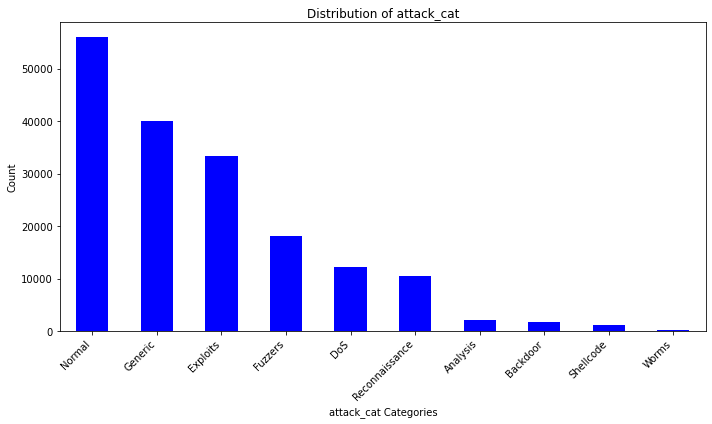

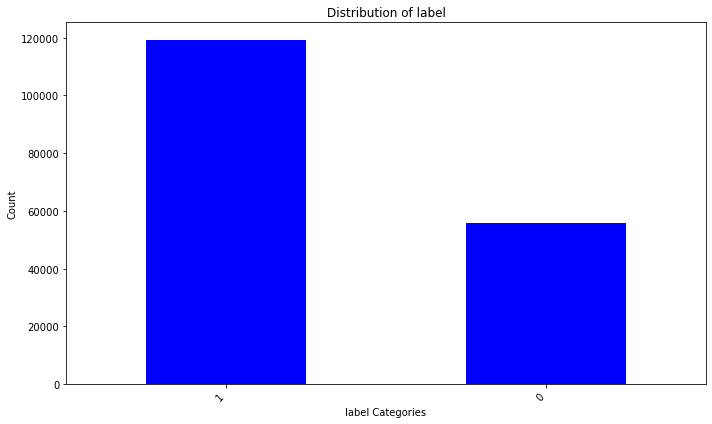

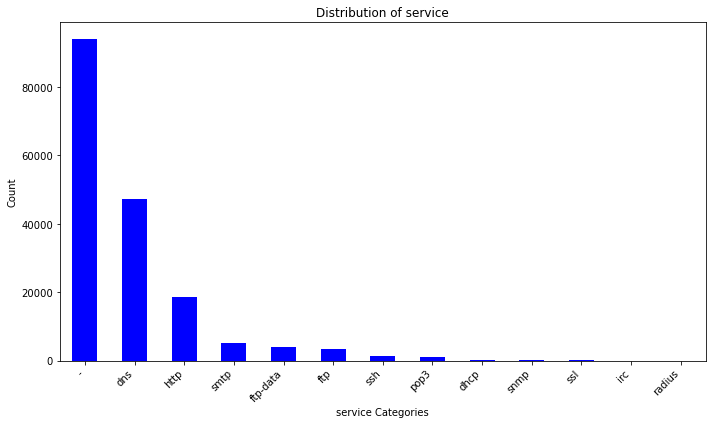

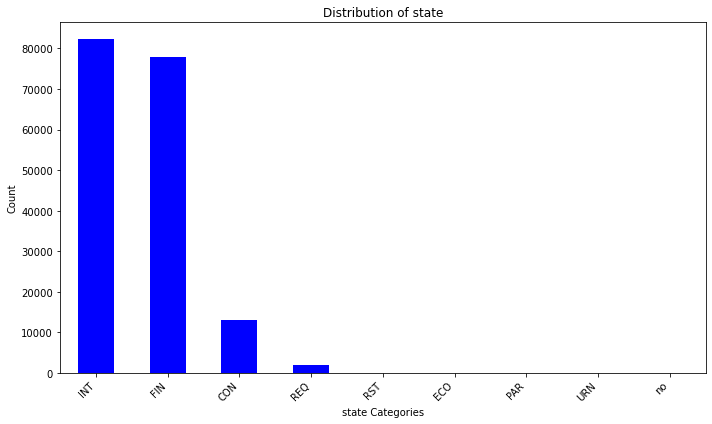

In [10]:
# Define the categorical columns to include
categorical_columns = ['attack_cat','label','service', 'state']  # Add your categorical column names here

# Plot unique category counts for each categorical column
for column in categorical_columns:
    # Count unique categories for the current column
    unique_categories = network_data[column].value_counts()

    # Create bar plot for unique category counts
    plt.figure(figsize=(10, 6))
    unique_categories.plot(kind='bar', color='blue')

    # Customize the plot
    plt.title(f'Distribution of {column}')
    plt.xlabel(f'{column} Categories')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()

    # Show the plot
    plt.show()



In [11]:
print(network_data['proto'].unique())

['tcp' 'udp' 'arp' 'ospf' 'icmp' 'igmp' 'rtp' 'ddp' 'ipv6-frag' 'cftp'
 'wsn' 'pvp' 'wb-expak' 'mtp' 'pri-enc' 'sat-mon' 'cphb' 'sun-nd' 'iso-ip'
 'xtp' 'il' 'unas' 'mfe-nsp' '3pc' 'ipv6-route' 'idrp' 'bna' 'swipe'
 'kryptolan' 'cpnx' 'rsvp' 'wb-mon' 'vmtp' 'ib' 'dgp' 'eigrp' 'ax.25'
 'gmtp' 'pnni' 'sep' 'pgm' 'idpr-cmtp' 'zero' 'rvd' 'mobile' 'narp' 'fc'
 'pipe' 'ipcomp' 'ipv6-no' 'sat-expak' 'ipv6-opts' 'snp' 'ipcv'
 'br-sat-mon' 'ttp' 'tcf' 'nsfnet-igp' 'sprite-rpc' 'aes-sp3-d' 'sccopmce'
 'sctp' 'qnx' 'scps' 'etherip' 'aris' 'pim' 'compaq-peer' 'vrrp' 'iatp'
 'stp' 'l2tp' 'srp' 'sm' 'isis' 'smp' 'fire' 'ptp' 'crtp' 'sps'
 'merit-inp' 'idpr' 'skip' 'any' 'larp' 'ipip' 'micp' 'encap' 'ifmp'
 'tp++' 'a/n' 'ipv6' 'i-nlsp' 'ipx-n-ip' 'sdrp' 'tlsp' 'gre' 'mhrp' 'ddx'
 'ippc' 'visa' 'secure-vmtp' 'uti' 'vines' 'crudp' 'iplt' 'ggp' 'ip'
 'ipnip' 'st2' 'argus' 'bbn-rcc' 'egp' 'emcon' 'igp' 'nvp' 'pup' 'xnet'
 'chaos' 'mux' 'dcn' 'hmp' 'prm' 'trunk-1' 'xns-idp' 'leaf-1' 'leaf-2'
 'rdp' 'irtp

In [12]:
print(network_data['service'].unique())

['-' 'ftp' 'smtp' 'snmp' 'http' 'ftp-data' 'dns' 'ssh' 'radius' 'pop3'
 'dhcp' 'ssl' 'irc']


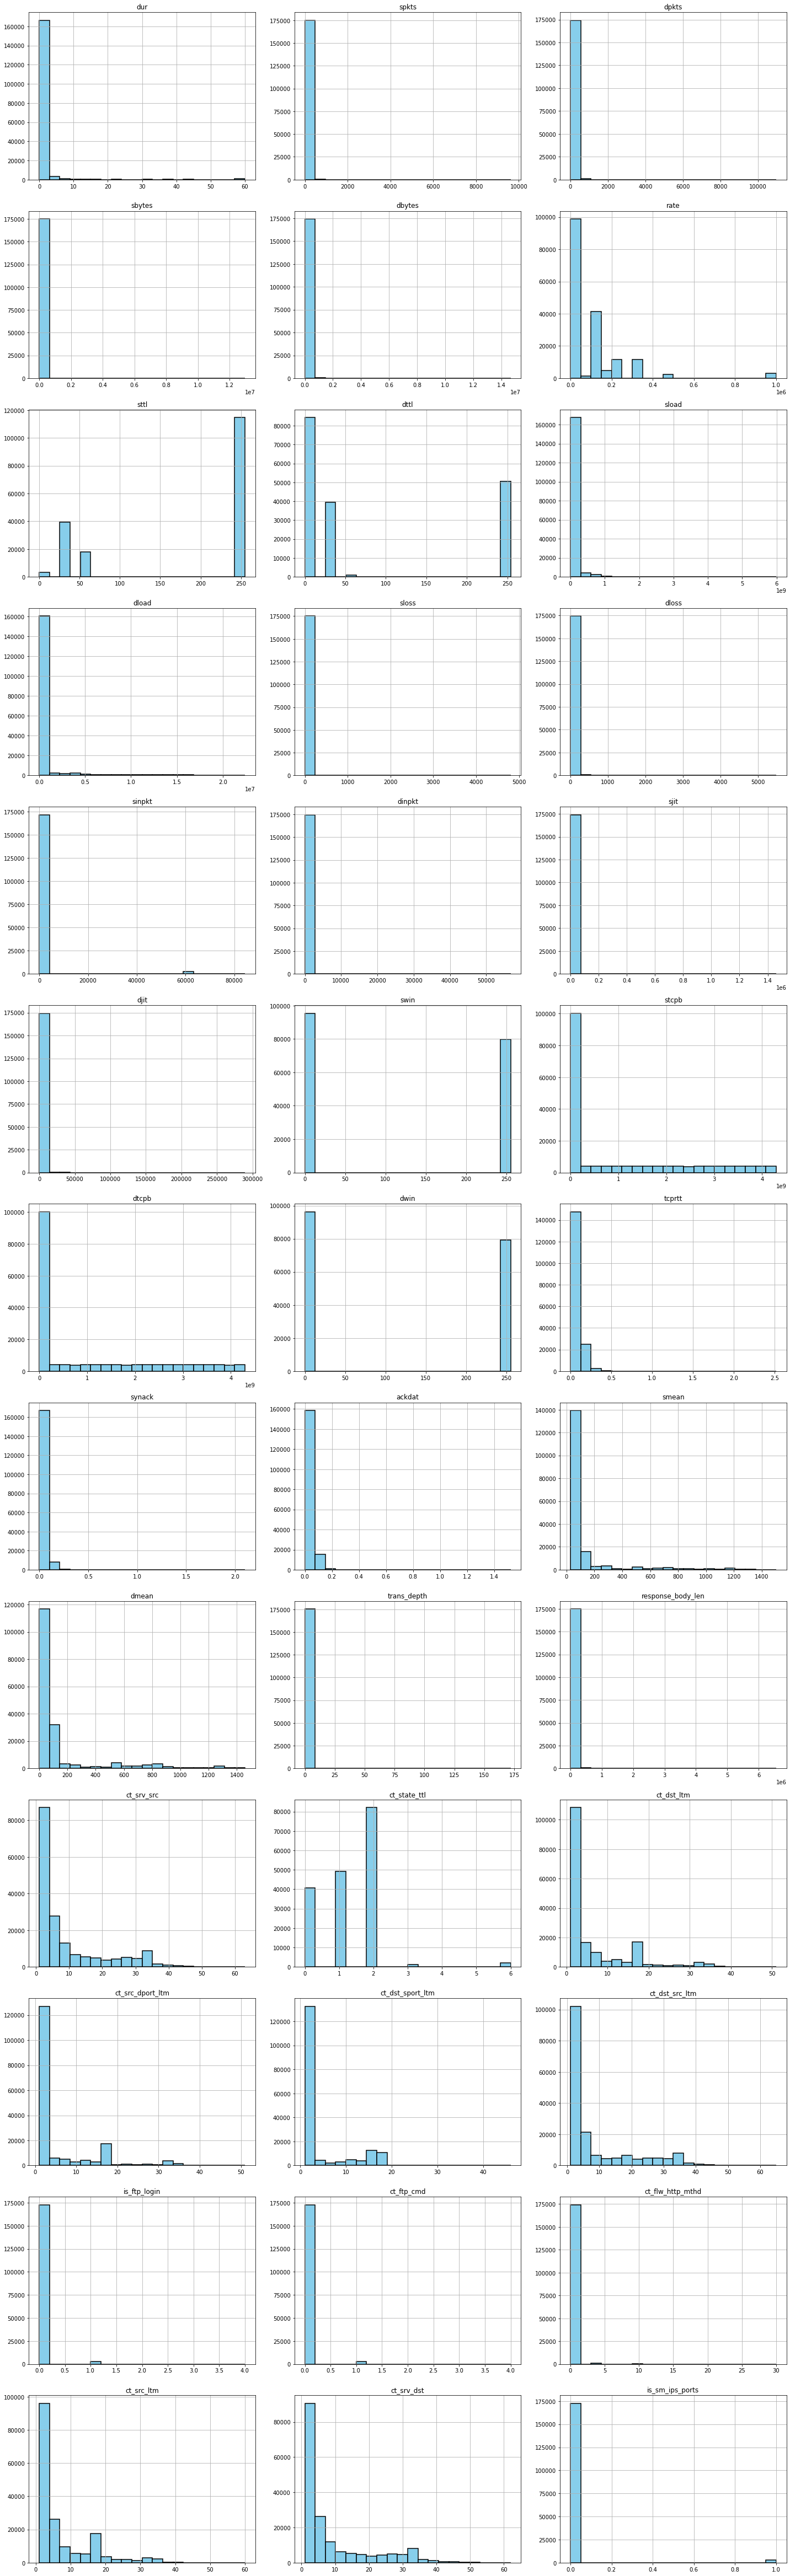

In [13]:
import matplotlib.pyplot as plt

# Select numerical columns excluding 'ID' and 'Label'
numerical_columns = network_data.drop(columns=['id', 'label']).select_dtypes(include=['int', 'float']).columns

# Plot histograms of numerical columns separately, arranging them in multiple plots per line
num_plots = len(numerical_columns)
num_plots_per_line = 3  # Define the number of plots per line
num_rows = (num_plots + num_plots_per_line - 1) // num_plots_per_line  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, num_plots_per_line, figsize=(20, 5*num_rows))  # Increase figure size

# Flatten the axes array if there's only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

for i, column in enumerate(numerical_columns):
    row_idx = i // num_plots_per_line
    col_idx = i % num_plots_per_line
    network_data[column].hist(bins=20, ax=axes[row_idx, col_idx], color='skyblue', edgecolor='black', linewidth=1.5)
    axes[row_idx, col_idx].set_title(column)  # Set title for each subplot

# Remove empty subplots if the number of plots is not a multiple of num_plots_per_line
if num_plots % num_plots_per_line != 0:
    for j in range(num_plots % num_plots_per_line, num_plots_per_line):
        fig.delaxes(axes[num_rows - 1, j])

plt.tight_layout()  # Adjust layout
plt.show()


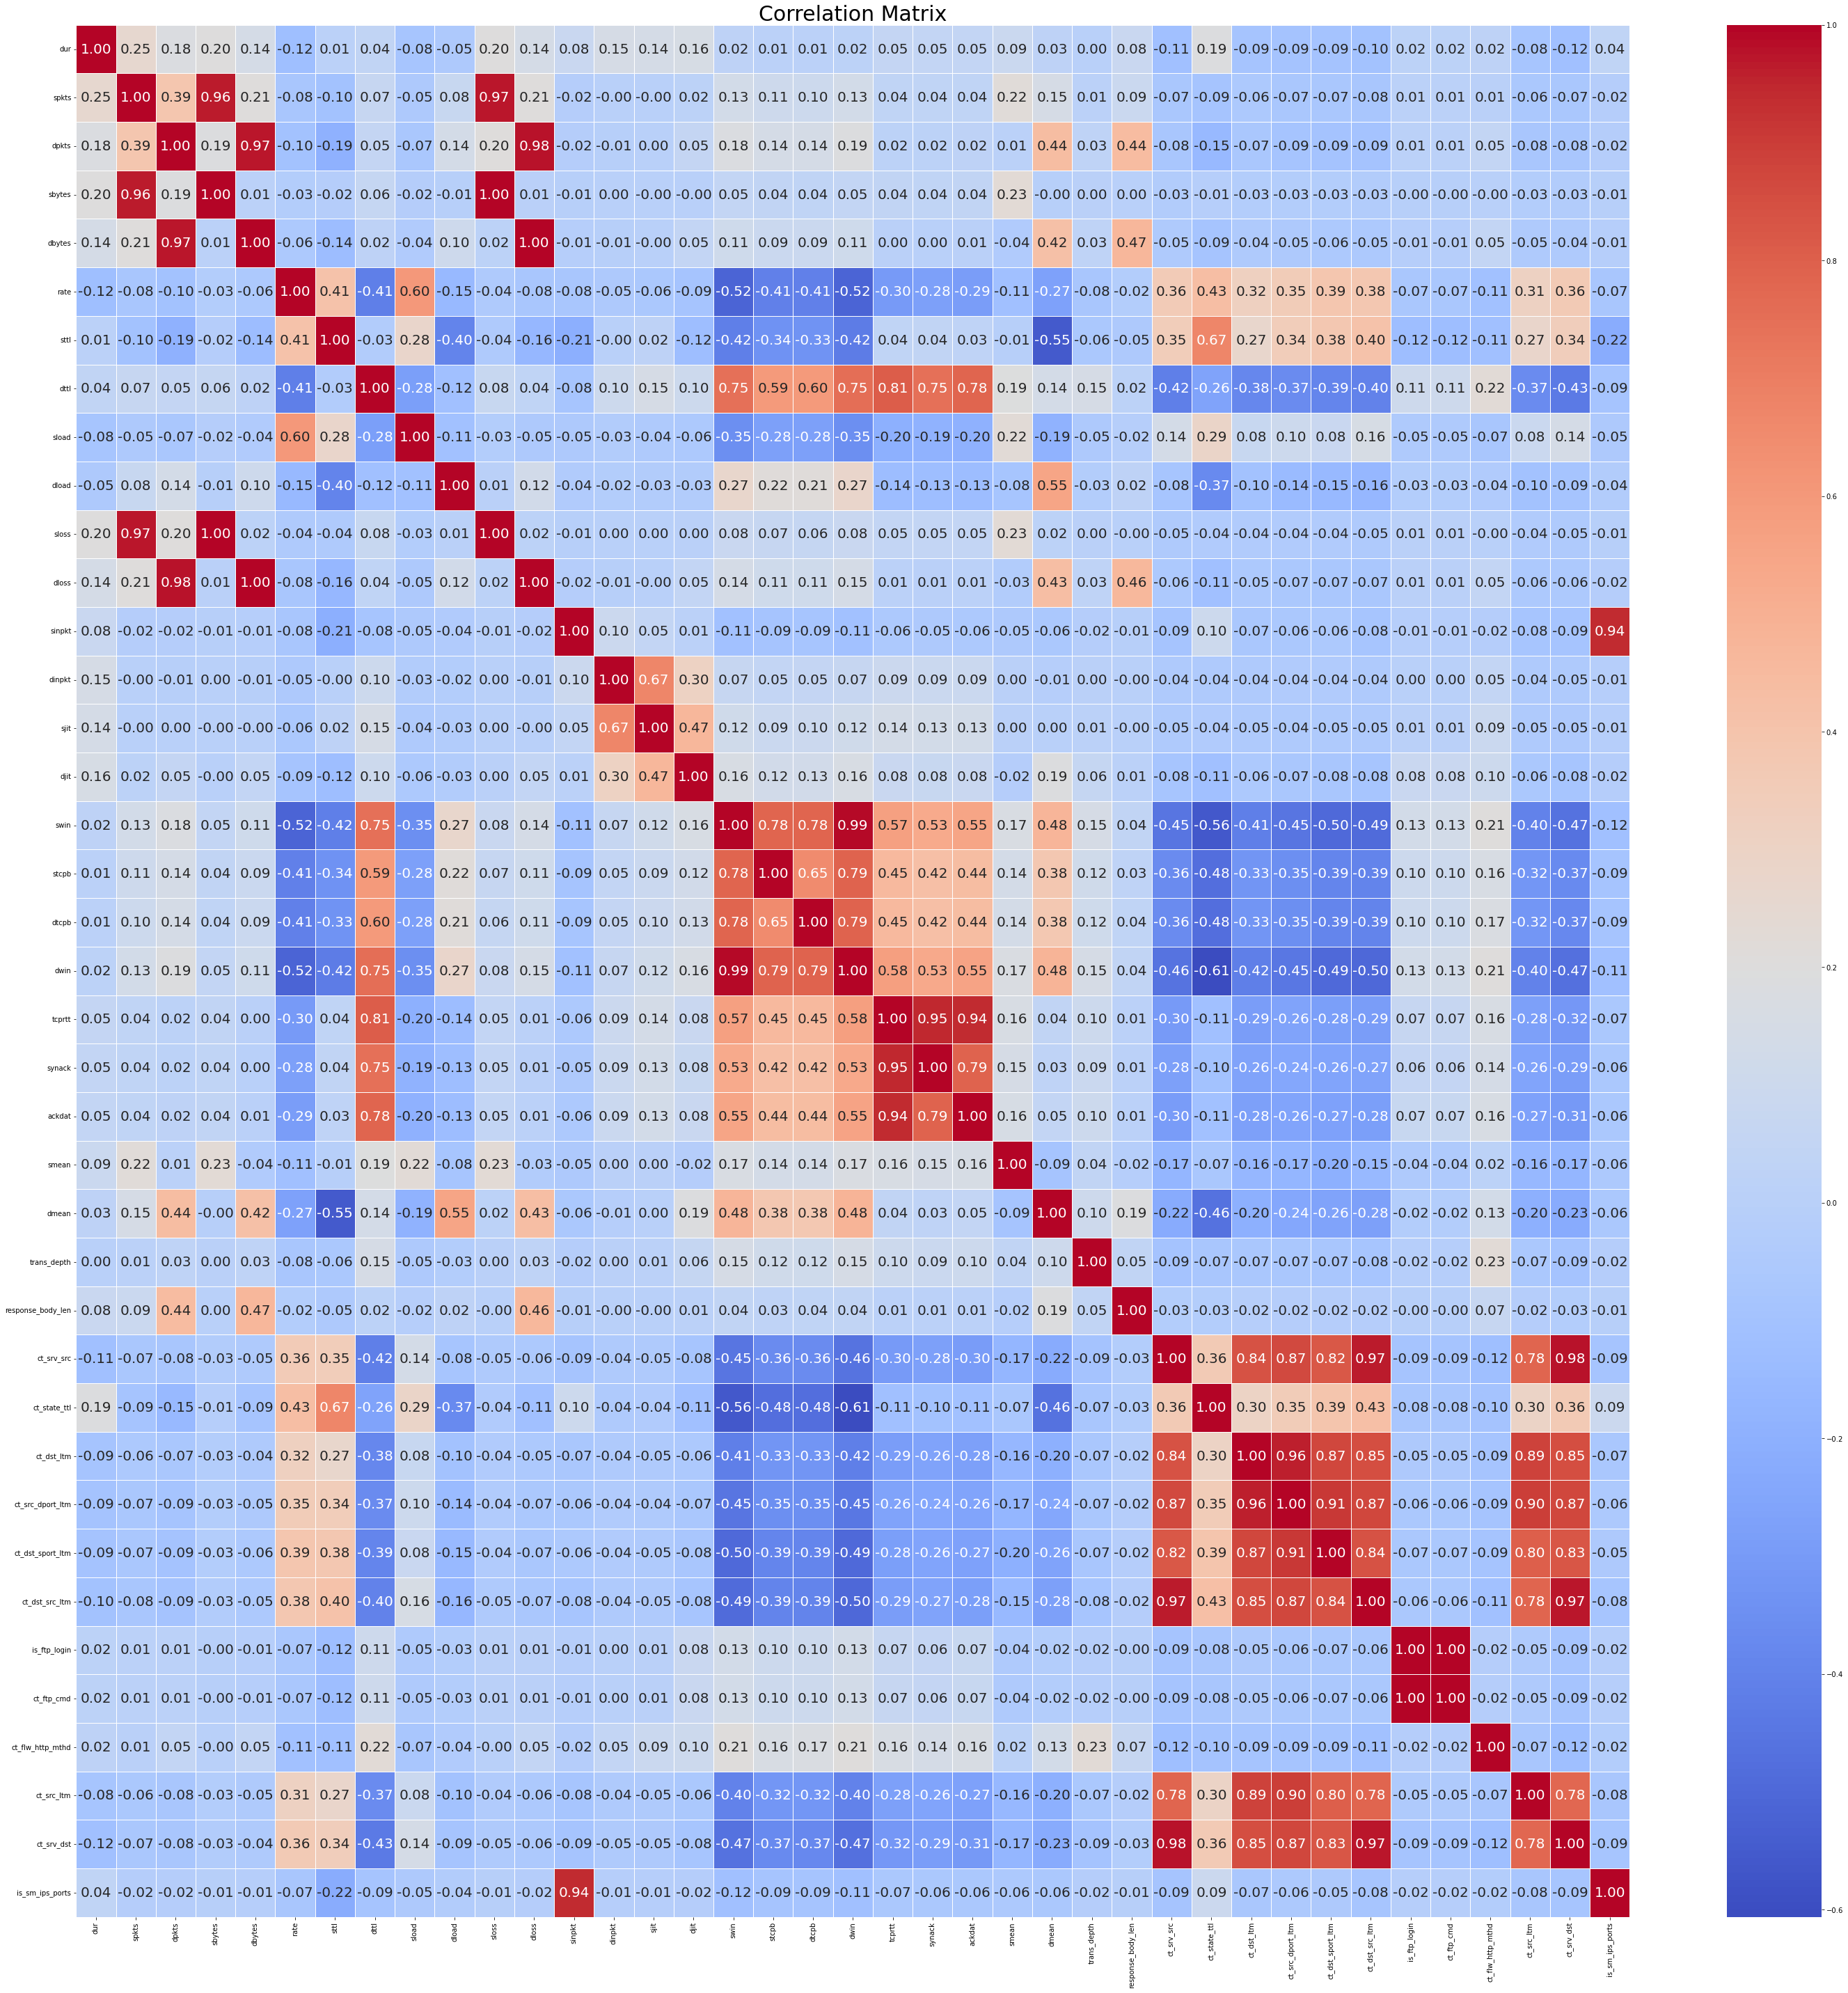

In [14]:
# Drop 'ID' and 'Label' columns
data_without_id_label = network_data.drop(columns=['id', 'label','attack_cat'])

# Create correlation matrix
correlation_matrix = data_without_id_label.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(50, 50))  # Increase figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 20})
plt.title('Correlation Matrix', fontsize=30)  # Adjust title font size
plt.show()

Based on the insights this far , we are working with 175,341 rows and 45 columns, each row represents Network Activity. 4 Columns are categorical and the rest are numerical features. There's a presence of a label column that highlights whether it was a normal vector or an abnormal network activity ( Malicious Activity). The data has no duplicate rows and it has no missing values. However I noted some columns are such as service have questionable categories such as "-", I will work with the data in this format considering it accounts for over half the records.


The dataset also has a high number of features some of which are highy correlated. This would make calculations harder in high dimensional spaces and might require longer compute and training periods. To fit the models we are working on we have to treat catgoerical variables by creating dummy variables to represent each unique entry per catgorical column. Because we have 4 catgoerical variables with many unique values the number of features could scale from 45 to an even larger number( we will analysis what the resulting number is in the codes that follow)


In industry where more features would be available 45 features might not be considered a high dimensional space but I will use it to demonstrate dimensionailty reduction techiques and how not every feature accounts for variance in the data set.


The dataset consists of 9 attack types and some instances that are normal ['Normal' 'Backdoor' 'Analysis' 'Fuzzers' 'Shellcode' 'Reconnaissance'
 'Exploits' 'DoS' 'Worms' 'Generic']

In [15]:
# Create a copy 
original_network_data = network_data.copy()

# Drop the 'id' column
network_data = network_data.drop('id', axis=1)

In [16]:
network_data.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0


In [17]:
# Reorder the columns so that object columns come first
object_columns = network_data.select_dtypes(include=['object']).columns.tolist()
non_object_columns = [col for col in network_data.columns if col not in object_columns]
ordered_columns = object_columns + non_object_columns
network_data_reordered = network_data[ordered_columns]
#Show new order 
print(network_data_reordered.dtypes)

proto                 object
service               object
state                 object
attack_cat            object
dur                  float64
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

# 2. Data Preprocessing

In this section, I am:
- Scaling the Data: Standardizing the data to ensure that no variables disproportionately affect the variance or skew the results. This step normalizes the dataset, preventing features with larger ranges from dominating the Principal Component Analysis (PCA).
- Encoding Categorical Variables: Converting categorical data into numerical format using One-Hot Encoding, which transforms categorical features into binary vectors, making them suitable for machine learning models.
- Encoding Labels: Transforming class labels into numerical values using label encoding, which is necessary for models to work with numerical data.
- Splitting the Data: Dividing the dataset into training and testing subsets, facilitating model evaluation and validation. This allows for an assessment of the model’s performance on unseen data.
- Converting to Dense Matrices: Transforming sparse matrices into dense matrices to improve the efficiency and compatibility of the model training process. Dense matrices are more suitable for certain machine learning algorithms that do not handle sparse formats well.

In [28]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

# Create predictor variables and the response
X = network_data.drop(columns=['label', 'attack_cat'], axis=1)
y = network_data['attack_cat']

# View the feature data
print(X.head())

        dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   sttl  ...  ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
0   252  ...           1                 1                 1               1   
1    62  ...           1                 1                 1               2   
2    62  ...           2                 1                 1               3   
3    62  ...           2                 1                 1               3   
4   254  ...           2                 2                 1              40   

   is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_

In [30]:
#view the Y i will use for multiclassification
print(y)

0            Normal
1            Normal
2            Normal
3            Normal
4            Normal
            ...    
175336      Generic
175337    Shellcode
175338      Generic
175339      Generic
175340      Generic
Name: attack_cat, Length: 175341, dtype: object


In [31]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Viewing the dimensions I am working with 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140272, 42)
(35069, 42)
(140272,)
(35069,)


In [32]:
# In this section I will scale the data so that variables importance or variance are not skewed towards one variable


# Define numerical and categorical features for prepocessing dif categories
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing pipeline
preprocessor = make_column_transformer(
    (StandardScaler(), numerical_features),  # Standardize numerical features
    (OneHotEncoder(handle_unknown='ignore'), categorical_features),  # One-hot encode categorical features
    remainder='passthrough'  # Pass through any other features
)

# Fit and transform the training data using the preprocessing pipeline
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Transform the testing data using the fitted preprocessing pipeline
X_test_preprocessed = preprocessor.transform(X_test)

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [38]:
#view preprocessed data
print(X_train_preprocessed.shape)
print(X_test_preprocessed.shape)

(140272, 193)
(35069, 193)


In [40]:
# Convert sparse matrices to dense matrices
X_train_preprocessed_dense = X_train_preprocessed.toarray()
X_test_preprocessed_dense = X_test_preprocessed.toarray()

#print
print(X_train_preprocessed_dense)
print(X_train_preprocessed_dense.shape)


[[-0.12989981 -0.0766563  -0.10064921 ...  0.          0.
   0.        ]
 [-0.20999167 -0.13757265 -0.17422055 ...  0.          0.
   0.        ]
 [-0.06794667 -0.01573995 -0.06386354 ...  0.          0.
   0.        ]
 ...
 [-0.20999182 -0.13757265 -0.17422055 ...  0.          0.
   0.        ]
 [-0.20999244 -0.13757265 -0.17422055 ...  0.          0.
   0.        ]
 [-0.20999167 -0.13757265 -0.17422055 ...  0.          0.
   0.        ]]
(140272, 193)


# 3. MODEL FITTING

In this section, I am performing the following tasks:

- **Dimensionality Reduction using PCA** : The aim of Principal Component Analysis is to reduce dimensionality  while retaining as much variance as possible. Each principal component from the principal components \(z\) captures an amount of variance. The first principal component captures the most variance and corresponds to the largest eigenvalue. This is done to improve effiency so that we don't have to work with all columns.

- I also plot a cumulative graph and scree plot in this section. A scree plot shows the amount of variance captured by each component K. A good measure to choose how many k components to use is to use a number of k's that captures a high percentage of the total variance usually between  \( 80\% - 100\% \) . A good way is to calculate the cumulative variance captured as it adds the sum of variance added by each component till it reaches \(100\% \). This way it is possible to see how many Ks equate to the a variance between \( 80\% - 100\% \). 

- Looking at the resulting plot 30 principal components capture 100 % of the variance which is much lower than the 193 columns/variables we would have been working with before PCA.

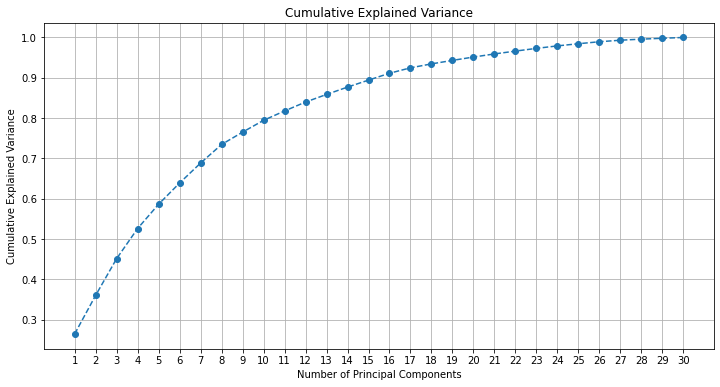

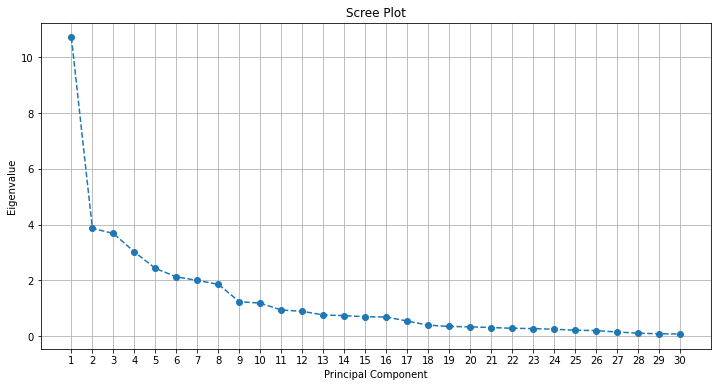

In [44]:
#importing libraries i will be using 
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train_preprocessed_dense)
X_test_pca = pca.transform(X_test_preprocessed_dense)

# Calculate cumulative explained variance
eigenvalues = pca.explained_variance_
cumulative_explained_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

# Plot cumulative explained variance
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(eigenvalues) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(eigenvalues) + 1))
plt.grid(True)
plt.show()

# Plot scree plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xticks(range(1, len(eigenvalues) + 1))
plt.grid(True)
plt.show()

In this next part I fit 4 types of classification models; Naive Bayes , Logistic Regression , 

Fitting the Following Models:

**Naive Bayes:**

-  Niave bayes is a probabilistic classifier based on Bayes’ theorem that aims to model the distributions within clusters by assuming each class follows a specific distribution. For continuous data, it often uses a Gaussian (normal) distribution.. It aims to seperate data into multiple multivariate guassian distributions. It assumes independence between features given the class label (naive assumption). It’s particularly effective for large datasets and text classifications where it often performs well despite the independence assumption.

Naive Bayes Accuracy: 54.61%
Naive Bayes Precision: 0.71
Naive Bayes Recall (Sensitivity): 0.55
Naive Bayes F1 Score: 0.59


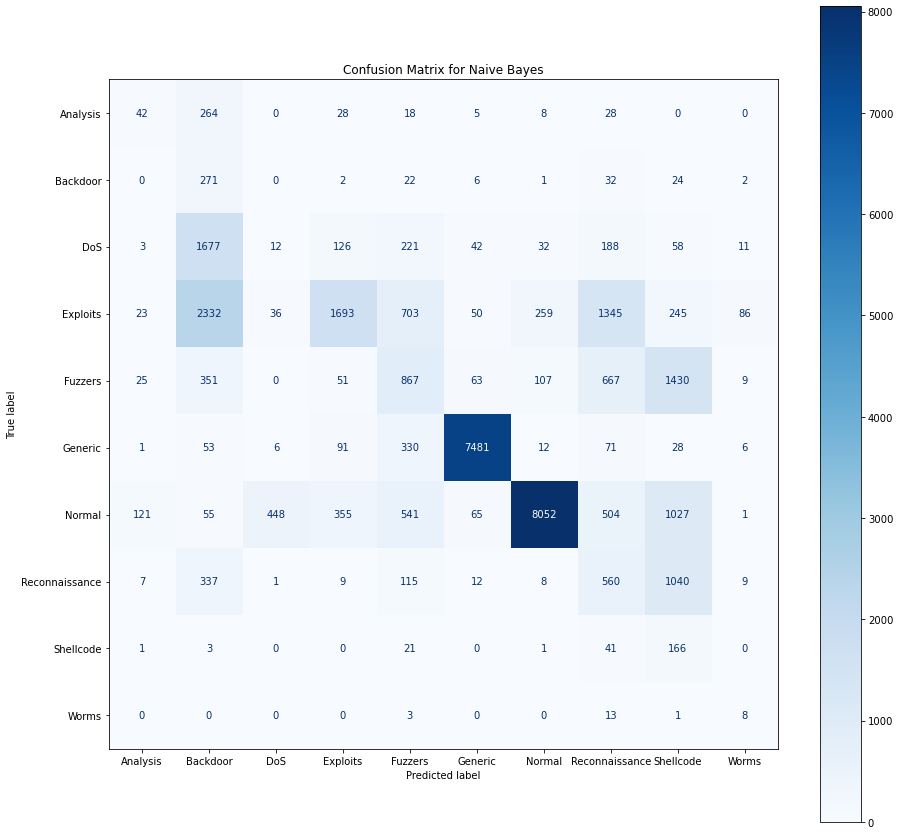

In [56]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Fit and predict using Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)
y_pred_nb = gnb.predict(X_test_pca)

# Calculate metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb) * 100
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')  # Sensitivity
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

# Print metrics
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}%")
print(f"Naive Bayes Precision: {precision_nb:.2f}")
print(f"Naive Bayes Recall (Sensitivity): {recall_nb:.2f}")
print(f"Naive Bayes F1 Score: {f1_nb:.2f}")  
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(15, 15))
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title("Confusion Matrix for Naive Bayes")
plt.show()


Logistic Regression:

- Logistic Regression is a linear model that estimates the probability that a given input belongs to a certain class by fitting a logistic (sigmoid) function to the data. This model is particularly effective for understanding the relationship between the dependent variable and one or more independent variables, making it useful for scenarios where interpretability is important.



/Users/ngomalalakangwa/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logitistic Regression Accuracy: 76.80%
Logitistic Regression Precision: 0.77
Logitistic Regression Recall (Sensitivity): 0.77
Logitistic Regression F1 Score: 0.75


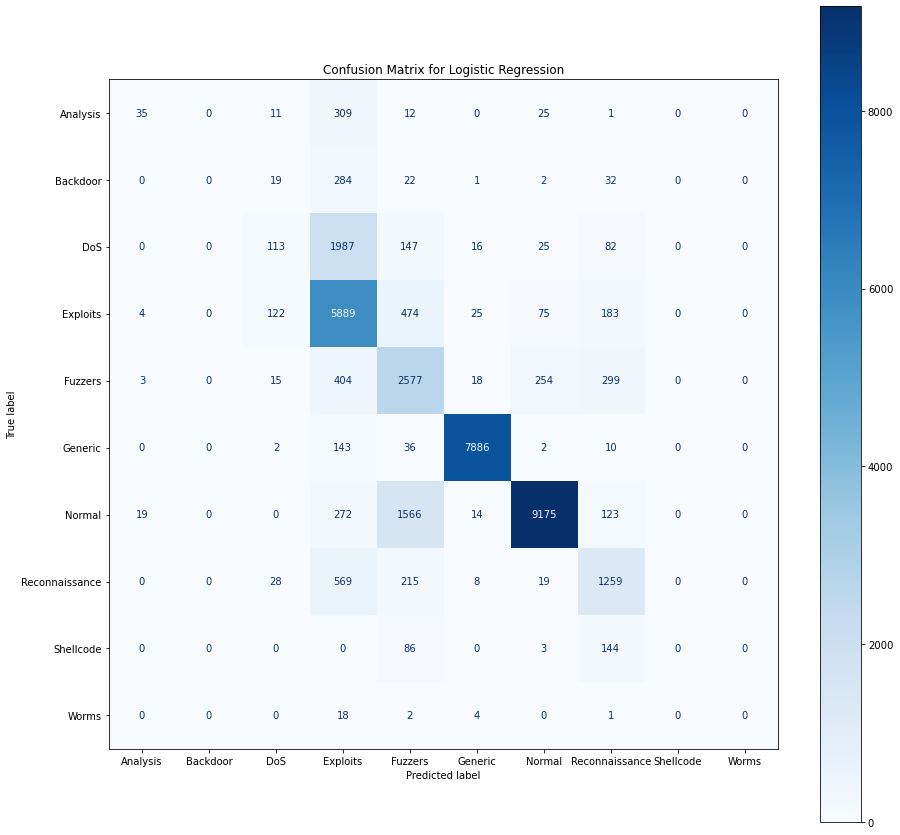

In [59]:
#fitting logistic regression
from sklearn.linear_model import LogisticRegression


# Fit and predict using Logistic Regression
lr = LogisticRegression(random_state=56, max_iter=500)
lr.fit(X_train_pca, y_train)
y_pred_lr = lr.predict(X_test_pca)

# Calculate metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr) * 100
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')  # Sensitivity
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# Print metrics
print(f"Logitistic Regression Accuracy: {accuracy_lr:.2f}%")
print(f"Logitistic Regression Precision: {precision_lr:.2f}")
print(f"Logitistic Regression Recall (Sensitivity): {recall_lr:.2f}")
print(f"Logitistic Regression F1 Score: {f1_lr:.2f}")  

# Compute confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix with adjusted figure size
plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr.classes_)
disp_lr.plot(cmap=plt.cm.Blues, ax=plt.gca())  
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

K-Nearest Neighbors (KNN):

- KMeans is a non-parametric algorithm that classifies a data point based on the majority class of its K-nearest neighbors in the feature space. KNN is intuitive and easy to implement


KNN Accuracy: 76.54%
KNN Precision: 0.77
KNN Recall (Sensitivity): 0.77
KNN F1 Score: 0.77


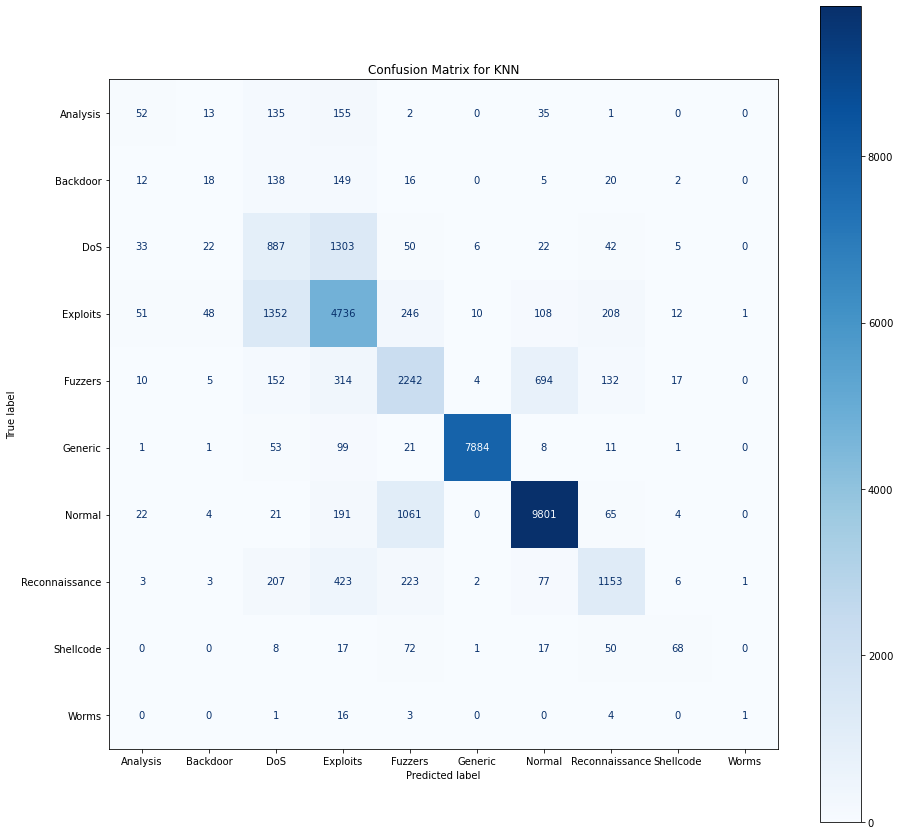

In [54]:
# Import knn
from sklearn.neighbors import KNeighborsClassifier


# Fit and predict using KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)
y_pred_knn = knn.predict(X_test_pca)

# Calculate metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn) * 100
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')  # Sensitivity
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Print metrics
print(f"KNN Accuracy: {accuracy_knn:.2f}%")
print(f"KNN Precision: {precision_knn:.2f}")
print(f"KNN Recall (Sensitivity): {recall_knn:.2f}")
print(f"KNN F1 Score: {f1_knn:.2f}")

# Compute and plot confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(15, 15))
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp_knn.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title("Confusion Matrix for KNN")
plt.show()

Neural Networks:

- Neural Network are inspired by biological neural networks. It consists of layers of interconnected artificial neurons that process input data to learn complex patterns. Neural networks are powerful for tasks involving complex data patterns and large datasets. They are particularly effective due to their ability to model non-linear relationships in the data.

NN Accuracy: 81.42%
NN Precision: 0.81
NN Recall (Sensitivity): 0.81
NN F1 Score: 0.80


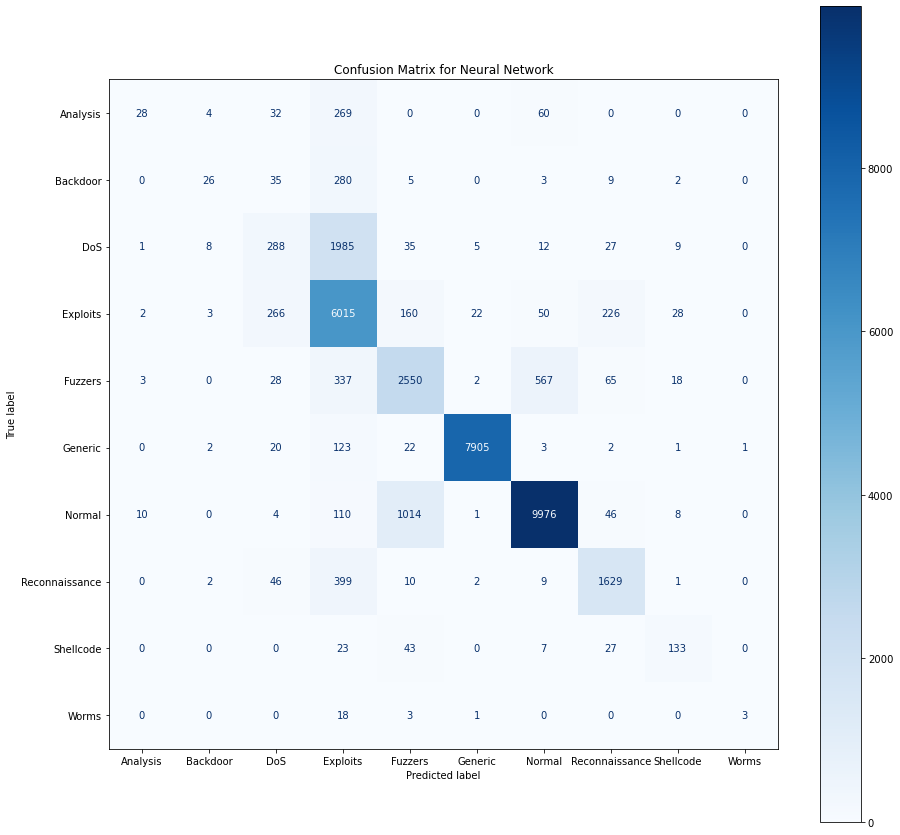

In [61]:
# Import MLPCLASSIFIER
from sklearn.neural_network import MLPClassifier


# Fit and predict using Neural Network
nn = MLPClassifier(random_state=56, max_iter=500)
nn.fit(X_train_pca, y_train)
y_pred_nn = nn.predict(X_test_pca)

# Calculate metrics
accuracy_nn = accuracy_score(y_test, y_pred_nn) * 100
precision_nn = precision_score(y_test, y_pred_nn, average='weighted')
recall_nn = recall_score(y_test, y_pred_nn, average='weighted')  # Sensitivity
f1_nn = f1_score(y_test, y_pred_nn, average='weighted')

# Print metrics
print(f"NN Accuracy: {accuracy_nn:.2f}%")
print(f"NN Precision: {precision_nn:.2f}")
print(f"NN Recall (Sensitivity): {recall_nn:.2f}")
print(f"NN F1 Score: {f1_nn:.2f}")

# Compute and plot confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(15, 15))
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=nn.classes_)
disp_nn.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title("Confusion Matrix for Neural Network")
plt.show()

# 4. Model Evaluation

Based on the results of the 4 different classifers I will make a few plots and explain after each one.

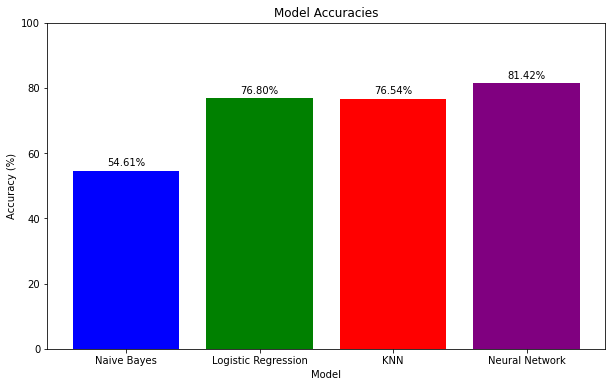

In [62]:
# models
models = ['Naive Bayes', 'Logistic Regression', 'KNN', 'Neural Network']

# Accuracies 
accuracies = [accuracy_nb, accuracy_lr, accuracy_knn, accuracy_nn]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies')
plt.ylim(0, 100) 

# title
for i in range(len(models)):
    plt.text(i, accuracies[i] + 1, f'{accuracies[i]:.2f}%', ha='center', va='bottom')

plt.show()

Accuracy is a measure of how well a model correctly classifies data points. It is defined as the ratio of correctly predicted instances to the total instances in the dataset. Mathematically, it can be expressed as:

$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} 
$$


$$ 
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

- **TP (True Positives)**: The number of positive instances correctly classified as positive.
- **TN (True Negatives)**: The number of negative instances correctly classified as negative.
- **FP (False Positives)**: The number of negative instances incorrectly classified as positive.
- **FN (False Negatives)**: The number of positive instances incorrectly classified as negative.


- **Neural Network Classifier:**<b>
    
Highest Accuracy: The Neural Network Classifier achieved the highest accuracy score of 81.42%. This indicates that 81.42% of the predictions made by the Neural Network were correct, showcasing its ability to learn and model complex patterns in the data effectively.
    
- **Logistic Regression:**<b>
    
Accuracy: Logistic Regression achieved an accuracy score of 76.54%. This is a strong performance, highlighting its efficiency in finding the optimal linear boundary that separates the classes, especially in datasets that are linearly separable after transformations like PCA.
    
- **K-Nearest Neighbors(KNN):**<b>
    
Accuracy: KNN achieved an accuracy score of 76.80%, which is comparable to Logistic Regression. KNN classifies instances based on the majority class among its nearest neighbors, making it effective for certain types of datasets where local patterns are significant.
    
- **Naive Bayes:**<b>
    
Lowest Accuracy: Naive Bayes performed the lowest with an accuracy score that is lower than the other models (54.61%) This lower performance is suggestive of the model’s assumption of feature independence, which might not hold true in the given dataset, leading to misclassifications.

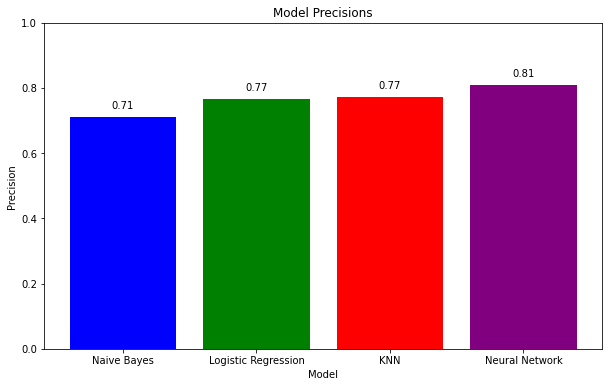

In [73]:
import matplotlib.pyplot as plt

#precision scores 
precision = [precision_nb, precision_lr, precision_knn, precision_nn]

#plot
plt.figure(figsize=(10, 6))
plt.bar(models, precision, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Model Precisions')
plt.ylim(0, 1) 

#precision values on top of bars
for i in range(len(models)):
    plt.text(i, precision[i] + 0.02, f'{precision[i]:.2f}', ha='center', va='bottom')

plt.show()

**Precision**

Precision is a measure of how many of the instances predicted as positive are actually positive. It is defined as the ratio of true positive instances to the total instances predicted as positive. Mathematically, it can be expressed as:

$$
\text{Precision} = \frac{\text{Number of Correct Positive Predictions}}{\text{Total Number of Positive Predictions}}
$$

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

- **TP (True Positives)**: The number of positive instances correctly classified as positive.
- **FP (False Positives)**: The number of negative instances incorrectly classified as positive.


**Neural Network Classifier**:
- **Highest Precision**: The Neural Network Classifier achieved the highest precision score of 81%. This indicates that 81% of the instances predicted as positive by the Neural Network were actually positive, showcasing its ability to minimize false positives effectively.

**Logistic Regression**:
- **Precision**: Logistic Regression achieved a precision score of 77%. This strong performance highlights its efficiency in correctly identifying positive instances, especially in datasets that are linearly separable after transformations like PCA.

**K-Nearest Neighbors (KNN)**:
- **Precision**: KNN achieved a precision score of 77%, which is comparable to Logistic Regression. KNN classifies instances based on the majority class among its nearest neighbors, making it effective for certain types of datasets where local patterns are significant.

**Naive Bayes**:
- **Lowest Precision**: Naive Bayes performed the lowest with a precision score that is lower than the other models 71.However this is still good considering it had a lower accuracy.

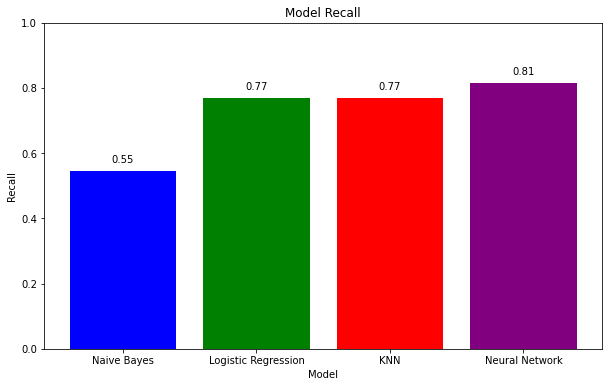

In [74]:
#recall scores
recall = [recall_nb, recall_lr, recall_knn, recall_nn]

#plot
plt.figure(figsize=(10, 6))
plt.bar(models, recall, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Model Recall')
plt.ylim(0, 1) 

#recakk values on top of bars
for i in range(len(models)):
    plt.text(i, recall[i] + 0.02, f'{recall[i]:.2f}', ha='center', va='bottom')

plt.show()

**Recall**

Recall, also known as Sensitivity or True Positive Rate (TPR), measures the ability of a model to identify all relevant instances within a dataset. It is the ratio of true positive instances to the total actual positive instances. Mathematically, it can be expressed as:

$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$



$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

- TP (True Positives): The number of positive instances correctly classified as positive.
- FN (False Negatives): The number of positive instances incorrectly classified as negative.



**Neural Network Classifier:**

Highest Recall: The Neural Network Classifier achieved the highest recall of 81%. This indicates that the model is very effective at identifying actual positive instances, minimizing the number of false negatives. High recall is crucial in contexts like intrusion detection, where missing an actual intrusion (false negative) could lead to significant security risks.

**K-Nearest Neighbors (KNN):**

- High Recall: KNN achieved a recall of 77%, which is comparable to the Neural Network Classifier. This high recall indicates that KNN is also effective at identifying positive instances. The model’s ability to classify based on the majority class among its nearest neighbors helps it capture local patterns effectively, leading to fewer false negatives.

**Logistic Regression:**

- Recall: Logistic Regression achieved a recall of 77%. This performance highlights its capability in identifying positive instances, especially in datasets that are linearly separable after transformations like PCA. Logistic Regression’s balance between precision and recall makes it a robust choice for many classification tasks.

**Naive Bayes:**

- Lowest Recall: Naive Bayes performed the lowest with a recall of 55%. This lower performance suggests that the model’s assumption of feature independence might not hold true in the given dataset, leading to a higher rate of false negatives. While Naive Bayes is efficient, it may not be suitable for datasets where feature dependencies are significant.

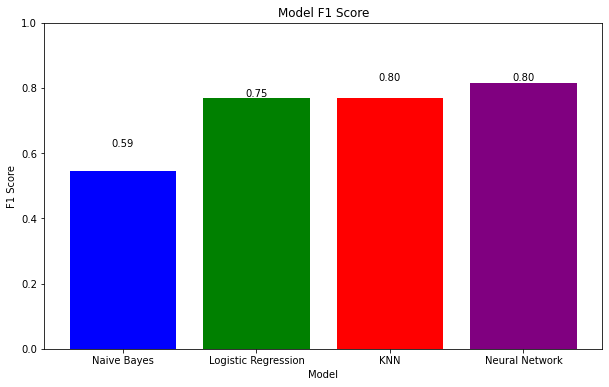

In [75]:
# f1 score
f1 = [f1_nb, f1_lr, f1_nn, f1_nn]

#plot
plt.figure(figsize=(10, 6))
plt.bar(models, recall, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Model F1 Score')
plt.ylim(0, 1)  

#f1 values on top of bars
for i in range(len(models)):
    plt.text(i, f1[i] + 0.02, f'{f1[i]:.2f}', ha='center', va='bottom')

plt.show()

**F1 Score**

F1 Score is a measure that combines precision and recall into a single metric. It is the harmonic mean of precision and recall, providing a balance between the two. Mathematically, it can be expressed as:

$$
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$



$$
\text{F1 Score} = \frac{2 \times TP}{2 \times TP + FP + FN}
$$

- **TP (True Positives):** The number of positive instances correctly classified as positive.
- **FP (False Positives):** The number of negative instances incorrectly classified as positive.
- **FN (False Negatives):** The number of positive instances incorrectly classified as negative.



**Neural Network Classifier:**

- Highest F1 Score: The Neural Network Classifier achieved the highest F1 score of 80%. This indicates a good balance between precision and recall, showcasing its ability to correctly identify positive instances while minimizing false positives and false negatives. An F1 score of 80% suggests that the model is effectively capturing the relevant patterns in the data, resulting in accurate and reliable predictions.

**K-Nearest Neighbors (KNN):**

- Highest F1 Score: KNN also achieved an F1 score of 80%, which is comparable to the Neural Network Classifier. This high F1 score indicates that KNN is equally effective in balancing precision and recall. KNN classifies instances based on the majority class among its nearest neighbors, making it particularly effective for datasets where local patterns are significant. The F1 score of 80% suggests that KNN is capable of accurately identifying positive instances while maintaining a low rate of false positives and false negatives.
    
**Logistic Regression:**

- F1 Score: Logistic Regression achieved an F1 score of 75%. This strong performance highlights its efficiency in maintaining a balance between precision and recall, especially in datasets that are linearly separable after transformations like PCA.


**Naive Bayes:**

- Lowest F1 Score: Naive Bayes performed the lowest with an F1 score that is lower than the other models (59%).

**Based on the confusion matrices, all models were effective at distinguishing between normal vectors and various types of intrusions. This indicates that the models can reliably identify normal traffic, which is a critical aspect of intrusion detection. However, the models showed weaknesses in classifying specific types of intrusions.**

# More Evaluation

Optimizing for Business Metrics

Depending on the business objectives, different metrics can be prioritized to choose the most suitable model:

**Maximizing Accuracy:**
- If the goal is to correctly classify as many instances as possible, the Neural Network Classifier or Logistic Regression would be ideal due to their high accuracy scores.

**Maximizing Precision:**
- For scenarios where false positives are costly (e.g., spam detection where misclassifying a legitimate email as spam is undesirable), models with high precision should be chosen. Both the Neural Network and Logistic Regression are good candidates here.

**Maximizing Recall:**
- If the focus is on minimizing false negatives (e.g., medical diagnosis where missing a positive case could be critical), models with high recall are preferred. Neural Networks excel in this area due to their high recall.

**Balancing Precision and Recall (F1 Score):**
- When a balance between precision and recall is necessary (e.g., fraud detection where both false positives and false negatives have significant costs), the F1 score becomes crucial. Both the Neural Network and KNN, with their high F1 scores, would be suitable choices.


In the context of multi-class intrusion detection, misclassifying an actual intrusion as a non-intrusion is undesirable, so maximizing recall (sensitivity) for each class of intrusion would be of important. This is because failing to detect an intrusion (false negative) could lead to significant security breaches and potential losses. Therefore, a model with high recall ensures that most, if not all, actual intrusions are detected, even if it means having some false positives (benign actions flagged as intrusions).

Neural Network Classifier and K-Nearest Neighbors (KNN), with their high F1 scores, are good candidates as they balance precision and recall effectively. However, for intrusion detection, focusing on recall might mean preferring a model that ensures high sensitivity to capture as many actual intrusions as possible across all classes.

# END OF NOTEBOOK